In [1]:
import os, sys, json
# set random seeds
import numpy as np
np.random.seed(0)
import random as rn
rn.seed(0)

In [2]:
import pandas as pd

In [3]:
path_read = "./data/combined_data.csv"

# read df from csv
df = pd.read_csv(path_read)
# assign each row a ID from 0 to n-1 and make it a main column
df = df.reset_index(drop=True)
df['row_id'] = df.index

In [4]:
len(df)

50000

In [5]:
df

text  gt_label  \
0      I got 'new' tires from them and within two wee...         0   
1      Don't waste your time.  We had two different p...         0   
2      All I can say is the worst! We were the only 2...         0   
3      I have been to this restaurant twice and was d...         0   
4      Food was NOT GOOD at all! My husband & I ate h...         0   
...                                                  ...       ...   
49995  Just wanted to write a review to chip in with ...         0   
49996  Great ambience. Great drinks. Great food. I lo...         4   
49997  I have been to the other Monks locations so I ...         3   
49998  Don't go here.  I know you might want to try i...         1   
49999  Buffet was recently open after renovation so m...         0   

       multiclass_predicted_label  single_class_logit_score  polar_radius  \
0                               0                  0.000179      0.893337   
1                               0                  0.000444      0.519094   
2                               0                  0.000043      0.889150   
3                               0                  0.000004      0.875254   
4                               0                  0.000013      0.799081   
...                           ...                       ...           ...   
49995                           1                  0.002904      1.133103   
49996                           4                  0.999981      0.720631   
49997                           3                  0.999862      0.655790   
49998                           1                  0.001741      0.883173   
49999                           1                  0.000172      0.867480   

       polar_theta  polar_theta_deg  pos_loss  neg_loss  base_loss  row_id  
0         0.679533        38.934379  3.637170  3.423840   4.001163       0  
1         0.626527        35.897380  3.356954  3.033727   4.223260       1  
2         0.656323        37.604547  3.785630  3.524564   4.136008       2  
3         0.552706        31.667748  3.353036  2.869883   3.647495       3  
4         0.636228        36.453198  3.176172  2.873306   3.618195       4  
...            ...              ...       ...       ...        ...     ...  
49995     0.709637        40.659229  3.798547  3.646442   3.949870   49995  
49996     1.152153        66.013533  2.362278  3.172081   3.590026   49996  
49997     0.838733        48.055875  3.373806  3.480679   4.198580   49997  
49998     0.654348        37.491350  3.848746  3.583591   4.204350   49998  
49999     0.667005        38.216583  3.842948  3.603918   4.226319   49999  

[50000 rows x 11 columns]

### Generate random examples for ground truth label

In [6]:
### Find all unique values of gt_label column
unique_gt_labels = df['gt_label'].unique()
unique_gt_labels

array([0, 2, 1, 3, 4])

In [7]:
# for each unique value in gt_label column, sample 2 random rows
sampled_rows = []
for label in unique_gt_labels:
    label_rows = df[df['gt_label'] == label].sample(2)

    # drop all rows except text, gt_label, polar_theta_deg, polar_radius
    label_rows = label_rows[['text', 'gt_label', 'polar_theta_deg', 'polar_radius', 'row_id']]
    # convert to dict
    label_rows_dict = label_rows.to_dict(orient='records')
    sampled_rows.extend(label_rows_dict)

In [8]:
with open("sampled_rows_gt_label.json", "w") as f:
    json.dump(sampled_rows, f, indent=4)

### Generate random examples for ground truth label


In [9]:
# remove all columns except text, gt_label, polar_theta_deg, polar_radius
df = df[['text', 'gt_label', 'polar_theta_deg', 'polar_radius', 'row_id']]

In [10]:
json_arr = []
for index, row in df.iterrows():
    json_arr.append(row.to_dict())

<Axes: xlabel='polar_theta_deg', ylabel='polar_radius'>

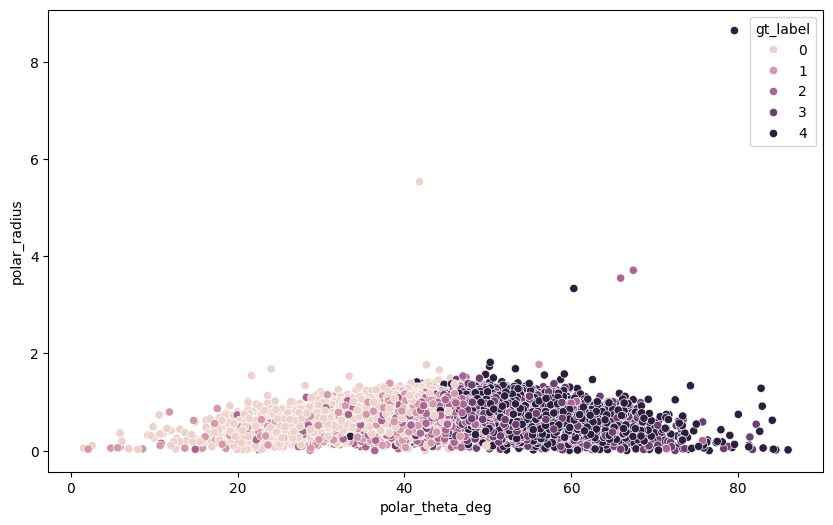

In [11]:
# plot distribution of polar_theta_deg vs polar_radius
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='polar_theta_deg', y='polar_radius', hue='gt_label')

In [12]:
df.describe()

gt_label  polar_theta_deg  polar_radius        row_id
count  50000.000000     49995.000000  49995.000000  50000.000000
mean       2.000000        45.235504      0.787358  24999.500000
std        1.414228         7.602492      0.214281  14433.901067
min        0.000000         1.524891      0.000213      0.000000
25%        1.000000        40.137601      0.662483  12499.750000
50%        2.000000        45.332787      0.806128  24999.500000
75%        3.000000        50.222666      0.932669  37499.250000
max        4.000000        85.978161      8.645297  49999.000000

<Axes: xlabel='polar_radius', ylabel='Count'>

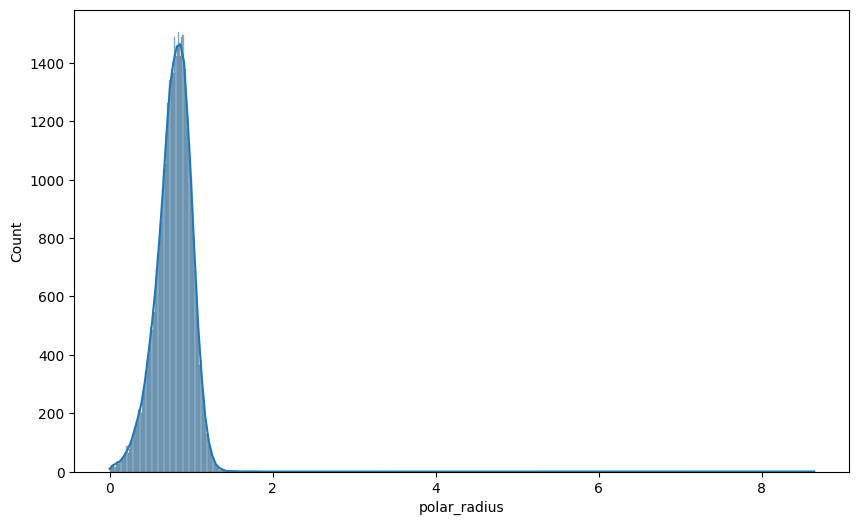

In [13]:
# plot distribution of polar_radius
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='polar_radius',kde=True)

In [14]:
theta_intervals = [
    [0, 5],
    [5, 30],
    [30, 40], 
    [40, 45], 
    [45, 50], 
    [50, 60], 
    [60, 85],
    [85, 90] 
]

radius_intervals = [
    [0, 0.1], 
    [0.1, 0.3], 
    [0.3, 0.5], 
    [0.5, 0.7], 
    [0.7, 1.0], 
    [1.0, 2.0], 
    [2.0, 4.0],
]

In [15]:
sampled_rows = []
for i, interval in enumerate(theta_intervals):
    start, end = interval
    filtered_df = df[(df['polar_theta_deg'] > start) & (df['polar_theta_deg'] < end)]
    for j, radius_interval in enumerate(radius_intervals):
        start, end = radius_interval
        filtered_df_2 = filtered_df[(filtered_df['polar_radius'] > start) & (filtered_df['polar_radius'] < end)]
        if len(filtered_df_2) == 0:
            continue
        max_len = min(2, len(filtered_df_2))
        sampled_row = filtered_df_2.sample(max_len)
        sampled_rows.append(sampled_row.to_dict(orient='records')[0])

In [16]:
sampled_rows

[{'text': 'Gross!',
  'gt_label': 0,
  'polar_theta_deg': 1.5248906501629105,
  'polar_radius': 0.0503884244831907,
  'row_id': 17259},
 {'text': 'The worse service.',
  'gt_label': 0,
  'polar_theta_deg': 2.546954956501185,
  'polar_radius': 0.1021007063025109,
  'row_id': 7266},
 {'text': 'Great food, but awful service.',
  'gt_label': 2,
  'polar_theta_deg': 15.823220467348548,
  'polar_radius': 0.064979348961822,
  'row_id': 23697},
 {'text': "food isn't good",
  'gt_label': 1,
  'polar_theta_deg': 23.36064903395412,
  'polar_radius': 0.2997414461696728,
  'row_id': 49512},
 {'text': 'Came here today. Got seated by the host and never got service! After about 20 mins of servers walking by and others being served that came in after we did we decided to leave.. Maybe we smelled bad???  but still gonna give it 1 star for being seated',
  'gt_label': 0,
  'polar_theta_deg': 29.467074786110004,
  'polar_radius': 0.4282352907205156,
  'row_id': 22834},
 {'text': 'Went the first time and i

In [17]:
len(sampled_rows)

40

In [18]:
with open("sampled_rows_theta_radius.json", "w") as f:
    json.dump(sampled_rows, f, indent=4)

In [20]:
def print_row(row):
    print("Row id: ", row['row_id'])
    print("GT Label: ", row['gt_label'])
    print("Polar theta: ", row['polar_theta_deg'])
    print("Polar radius: ", row['polar_radius'])
    print("Text: ", row['text'])


In [21]:
# select which has theta between 40 and 50 and radius very less ie less than 0.2
# filtered_df = df[(df['polar_theta_deg'] > 40) & (df['polar_theta_deg'] < 50)]
filtered_df = df[(df['polar_theta_deg'] <40)]
filtered_df = filtered_df[filtered_df['polar_radius'] >0.3]
filtered_df = filtered_df[filtered_df['gt_label'] <2]
print("Total rows: ", len(filtered_df))
# sort by polar_radius
filtered_df = filtered_df.sort_values(by=['polar_radius'], ascending=False)
for index, row in filtered_df.iterrows():
    print_row(row)
    print("###########")


Total rows:  10976
Row id:  35253
GT Label:  0
Polar theta:  24.01229269105996
Polar radius:  1.6813446960636818
Text:  Review pending.
###########
Row id:  6487
GT Label:  0
Polar theta:  21.64055206097296
Polar radius:  1.543504368855819
Text:  This rental community does not offer its residences a recycling drop facility!
###########
Row id:  30285
GT Label:  0
Polar theta:  33.35809910872325
Polar radius:  1.5330580838956738
Text:  closed 07-13-13
###########
Row id:  31512
GT Label:  1
Polar theta:  38.24163679682066
Polar radius:  1.3860592929365827
Text:  Waitress. the turkey burger is cold. Can you recook? We brought another. Ah, look, it's pink and uncooked. Sorry, we are learning the grill. That's my review. I hope it's better for you. Food is not a priority.
###########
Row id:  1370
GT Label:  0
Polar theta:  28.080756649697225
Polar radius:  1.3386888098589054
Text:  Rip . off.  Thief People Up In There.
###########
Row id:  6422
GT Label:  0
Polar theta:  39.46052383460783

In [22]:
rows_id_selected = [

    # neutral with less intensity
    31650, 6568, 29867, 
    # neutral with more intensity
    45268, 46, 466, 2, 
    # positive with less intensity
    24765, 26995,
    # positive with more intensity
    47130, 42301,
    # negative with less intensity
    8821, 21321,
    # negative with more intensity
    31512, 47857, 41469
]

fs_examples_df = {
    "neutral_with_less_intensity": [31650, 6568, 29867],
    "neutral_with_more_intensity": [45268, 46, 466, 2],
    "positive_with_less_intensity": [24765, 26995],
    "positive_with_more_intensity": [47130, 42301],
    "negative_with_less_intensity": [8821, 21321],
    "negative_with_more_intensity": [31512, 47857, 41469]
}

In [24]:
for key, ids in fs_examples_df.items():
    print("###########")
    print("For: ", key)
    for i in ids:
        row = df[df['row_id'] == i].iloc[0]
        print_row(row)
        print("---")
    print("###########")

###########
For:  neutral_with_less_intensity
Row id:  31650
GT Label:  2
Polar theta:  42.616396165437074
Polar radius:  0.1696623123460573
Text:  Over priced!  But then again it is the Las Vegas strip!! Cool atmosphere, typical food.
---
Row id:  6568
GT Label:  1
Polar theta:  46.44494185335199
Polar radius:  0.1175335076231174
Text:  Quick food.  Not surprisingly it tastes like a chain
---
Row id:  29867
GT Label:  0
Polar theta:  42.79328863239618
Polar radius:  0.1423642144270269
Text:  no comment!
---
###########
###########
For:  neutral_with_more_intensity
Row id:  45268
GT Label:  2
Polar theta:  43.300390094835535
Polar radius:  1.059069977169863
Text:  Great food with great vegan/vegetarian options . The staff could work on customer service as well as efficiency.  I literally dock a full star because their front door was getting stuck on the cement outside creating this awful nails on a chalkboard sound. No one seemed to want solve the problem. When my boyfriend attempted t